In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import batch_analysis as ba

In [2]:
def merge_by_type(node_type, dfs):
    merged = []
    for df in dfs:
        merged.append(df[df['node_type'] == node_type])
    merged = pd.concat(merged)
    return merged

In [4]:
# all_targets = []
# for i in tqdm(range(6)):
#     graphs = ba.load_batches(f'./graphs/graphs_{i}.pkl')
#     dfs = []
#     for graph in tqdm(graphs):
#         df = ba.get_data(graph)
#         dfs.append(df)
#     targets = merge_by_type('event_target', dfs)
#     all_targets.append(targets)

  0%|          | 0/6 [00:00<?, ?it/s]






Adding nodes to dataframe: 100%|██████████| 101162/101162 [00:00<00:00, 144353.80it/s]























































































































































































































































































































































































































































































































































































































































Loading event files: 100%|██████████| 2838/2838 [02:10<00:00, 21.79it/s]








Adding nodes to dataframe: 100%|██████████| 101222/101222 [00:00<00:00, 122135.36it/s]








































































KeyboardInterrupt: 

In [21]:
graphs = ba.load_batches('./graphs/graphs_0.pkl')

In [ ]:
dfs = []
for graph in tqdm(graphs):
    df = ba.get_data(graph)
    dfs.append(df)

Adding nodes to dataframe: 100%|██████████| 101162/101162 [00:01<00:00, 93581.86it/s]

Adding nodes to dataframe: 100%|██████████| 101222/101222 [00:01<00:00, 83803.74it/s][A

Adding nodes to dataframe: 100%|██████████| 100272/100272 [00:01<00:00, 75336.90it/s][A

Adding nodes to dataframe: 100%|██████████| 99132/99132 [00:01<00:00, 73326.12it/s]

Adding nodes to dataframe: 100%|██████████| 101136/101136 [00:01<00:00, 70068.43it/s][A

Adding nodes to dataframe: 100%|██████████| 101299/101299 [00:01<00:00, 78300.75it/s][A

Adding nodes to dataframe: 100%|██████████| 100723/100723 [00:01<00:00, 64826.37it/s][A

Adding nodes to dataframe: 100%|██████████| 99499/99499 [00:01<00:00, 72496.24it/s]

Adding nodes to dataframe: 100%|██████████| 102321/102321 [00:01<00:00, 75829.27it/s]

Loading event files:  61%|██████    | 1726/2838 [01:40<01:16, 14.56it/s]

In [ ]:
import pickle
with open('./graphs/graphs_0_df.pkl', 'wb') as f:
    pickle.dump(dfs, f)

# with open('./graphs/graphs_5_df.pkl', 'rb') as f:
#     dfs = pickle.load(f)

In [ ]:
# df = ba.get_data(graphs[3])

In [ ]:
def plot_umap(df):
    event_df = df[df['node_type'] == 'event']
    concept_df = df[df['node_type'] == 'concept']
    target_df = df[df['node_type'] == 'event_target']
    
    event_umap = event_df['umap_x'], event_df['umap_y']
    concept_umap = concept_df['umap_x'], concept_df['umap_y']
    target_umap = target_df['umap_x'], target_df['umap_y']

    # plot the umap embeds
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(*event_umap, s=1, alpha=0.5, label='event', c='b')
    ax.scatter(*concept_umap, s=1, alpha=0.5, label='concept', c='orange')
    ax.scatter(*target_umap, s=1, alpha=0.5, label='target', c='r')
    
    ax.set_title('GNN node embeddings')
    ax.legend()
    
    # hide axis
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.show()

In [ ]:
plot_umap(dfs[0])

In [ ]:
targets = merge_by_type('event_target', dfs)
events = merge_by_type('event', dfs)
concepts = merge_by_type('concept', dfs)

In [30]:
# merge the graphs
import networkx as nx
graph = nx.compose_all(graphs)

In [79]:
# concepts = merge_by_type('concept')
graph = graphs[0]
concepts = dfs[0][dfs[0]['node_type'] == 'concept']
concepts = concepts.drop(columns=['event_date', 'prediction', 'article_count', 'l1', 'mape', 'summary', 'lang'])

In [80]:
# add new columns to concepts
concepts['article_count'] = 0.0
concepts['targets'] = 0
concepts['target_count'] = 0.0
concepts['l1'] = 0.0
concepts['mape'] = 0.0
concepts['neigbors'] = 0

In [81]:
concept_ids = set(concepts.index)
target_ids = set(targets.index)

In [82]:
# iterate over edges between concepts and targets
# and calculate the average mape, l1, article_count
for concept in tqdm(concept_ids):
    if concept not in graph.nodes:
        continue
    
    # find all targets connected to the concept
    neighbors = list(graph.neighbors(concept))
    neighbors = [t for t in neighbors if t[0] != 'c']
    
    for event in neighbors:
        # get the target row
        event_row = dfs[0].loc[event] # 
        
        # get the concept row
        concept_row = concepts.loc[concept]
        
        concepts.loc[concept, 'neigbors'] += 1
        concepts.loc[concept, 'article_count'] += event_row['article_count']
        
        if event_row['node_type'] == 'event_target':
            concepts.loc[concept, 'targets'] += 1
            concepts.loc[concept, 'target_count'] += event_row['article_count']
            concepts.loc[concept, 'l1'] += event_row['l1']
            concepts.loc[concept, 'mape'] += event_row['mape']
            
# calculate the average
concepts['l1'] = concepts['l1'] / concepts['targets']
concepts['mape'] = concepts['mape'] / concepts['targets']
concepts['article_count'] = concepts['article_count'] / concepts['neigbors']
concepts['target_count'] = concepts['target_count'] / concepts['targets']

100%|██████████| 90030/90030 [01:21<00:00, 1102.02it/s]


In [29]:
concepts[concepts['targets']>1]

,node_type,title,umap_x,umap_y,article_count,targets,target_count,l1,mape,neigbors
node_id,,,,,,,,,,
c_20254,concept,Coach (sport),6.158305,11.902660,14.534188,10,17.900000,14.780510,0.903113,702
c_20398,concept,Wednesday,7.161501,13.283450,11.032129,3,9.333333,9.098641,0.964937,249
c_20060,concept,Thursday,8.026745,12.345089,10.802676,3,10.000000,15.140397,1.691128,299
c_20551,concept,Time,7.786864,13.237745,29.602386,8,29.875000,46.425827,2.022821,503
c_40848,concept,Physics,7.035509,12.751542,10.772727,2,9.500000,16.543572,1.676108,44
...,...,...,...,...,...,...,...,...,...,...
c_35200,concept,Inflammation,6.945848,12.386296,16.000000,2,45.000000,15.529047,0.670037,19
c_23841,concept,Metastasis,6.015038,11.513324,31.437500,2,170.000000,110.400552,0.449107,32
c_67352,concept,Kroger,7.429239,11.415842,27.952381,2,74.000000,63.181818,0.712898,21


In [83]:
targets

,node_type,event_date,article_count,prediction,l1,mape,title,summary,lang,umap_x,umap_y
node_id,,,,,,,,,,,
e_2783584,event_target,2015-03-23,6.0,14.112566,8.112566,1.352094,Врачей научат лечить через компьютер - ПитерБу...,"В России создают программу, которая будет конт...",rus,-0.511038,12.078978
e_2935752,event_target,2015-06-17,10.0,19.773096,9.773096,0.977310,York City Fixtures 2015-16,Minstermen.net Articles from 2005\n\nMinsterme...,eng,-0.705663,12.247521
e_2695877,event_target,2015-03-15,29.0,17.981825,11.018175,0.379937,Díaz afirma que el PP no sabe lo que le espera...,"Publicado 14/03/2015 14:30:39CET ""Quiero que e...",spa,-0.664496,12.210290
e_2904080,event_target,2015-05-28,14.0,52.770866,38.770866,2.769348,Puerto Rico lawmakers give final nod to sales ...,"SAN JUAN, Puerto Rico -- Legislators on Tuesda...",eng,-0.641070,11.165687
e_2696319,event_target,2015-03-17,10.0,40.170815,30.170815,3.017081,Wind Energy's Potential Offers Antidote to Fos...,"Last week, the U.S. DOE published its Wind Vis...",eng,-0.906798,11.755478
...,...,...,...,...,...,...,...,...,...,...,...
e_2578189,event_target,2015-02-25,31.0,14.439809,16.560192,0.534200,"""Islamischer Staat"" hält 270 Christen als Geiseln",Die Terrormiliz Islamischer Staat hat im Nordo...,deu,0.954799,15.635689
e_2786335,event_target,2015-03-27,52.0,57.350994,5.350994,0.102904,Take 4 Steps to Understand Student Loan Intere...,Interest rates can vary depending on the type ...,eng,-1.103795,13.485544
e_2827736,event_target,2015-04-08,33.0,23.444307,9.555693,0.289566,Police operation disrupts Beebone botnet used ...,"Europol, in collaboration with Dutch authoriti...",eng,-0.314003,14.507043


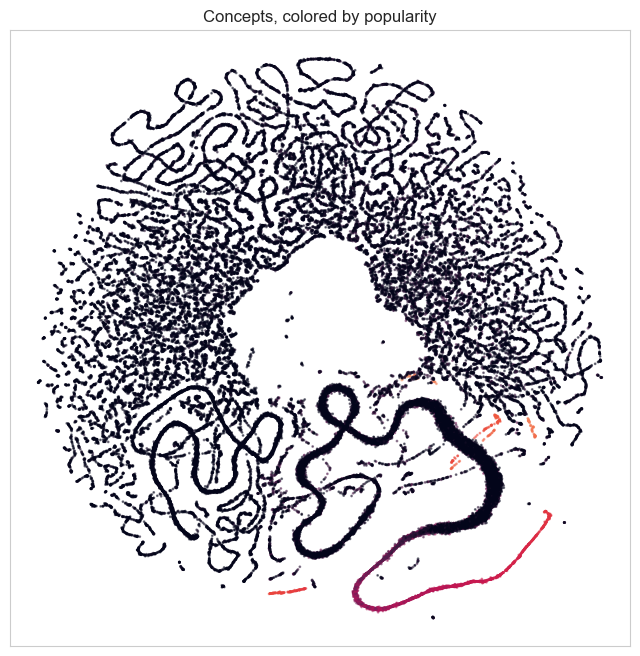

In [116]:
# plot concepts, color on a scale of log(article_count)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(concepts['umap_x'], concepts['umap_y'], s=1, alpha=0.5, c=np.log(concepts['targets']))
ax.set_title('Concepts, colored by popularity')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [157]:
langs = dfs[0]['lang'].unique()

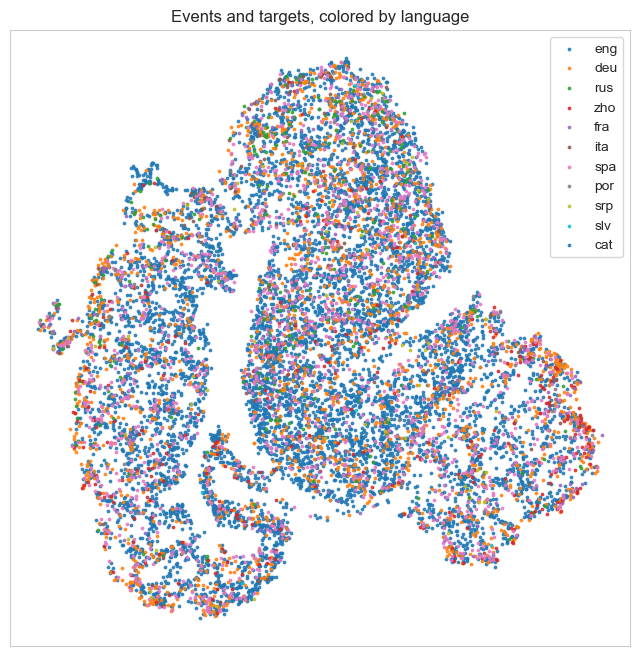

In [164]:
# plot events and targets, color by language
fig, ax = plt.subplots(figsize=(8, 8))
for lang in langs:
    if lang == 'nan':
        continue
    lang_df = dfs[0][dfs[0]['lang'] == lang]
    ax.scatter(lang_df['umap_x'], lang_df['umap_y'], s=3, alpha=0.8, label=lang)
ax.set_title('Events and targets, colored by language')

# axis off
ax.set_xticks([])
ax.set_yticks([])

ax.legend()
plt.show()


In [166]:
# compute mape on targets, grouped by language
mape_by_lang = targets.groupby('lang')['mape'].mean()
mape_by_lang

lang
cat    0.729514
deu    0.710203
eng    0.909293
fra    0.710413
ita    0.640298
por    0.601471
rus    0.630674
slv    0.714946
spa    0.574819
srp    0.571084
zho    0.638082
Name: mape, dtype: float32

In [188]:
events = merge_by_type('event')

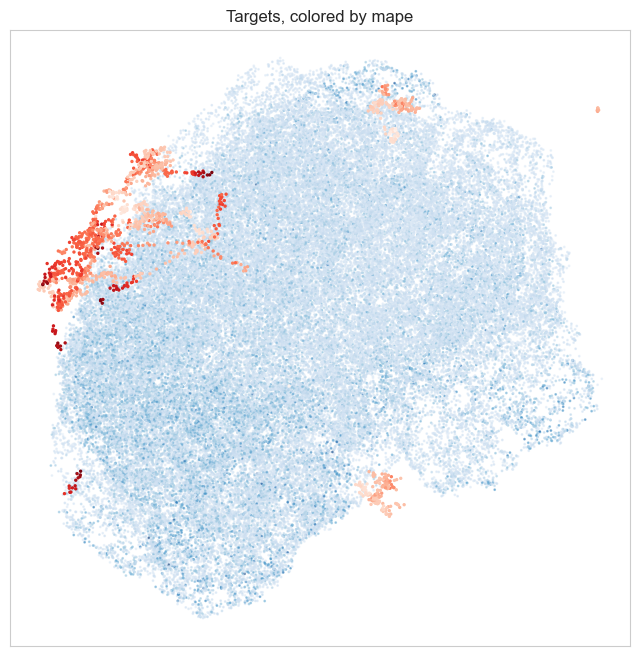

In [198]:
# plot targets, color by mape
fig, ax = plt.subplots(figsize=(8, 8))
# plot targets, color by article_count
ax.scatter(events['umap_x'], events['umap_y'], s=1, alpha=0.5, c=np.log(events['article_count']+1), cmap='Blues')
ax.scatter(targets['umap_x'], targets['umap_y'], s=2, alpha=1, c=np.log(targets['prediction']+1), cmap='Reds')
ax.set_title('Targets, colored by mape')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [14]:
# targets[targets['article_count'] < 25]['class'] = 'low'
# targets[targets['article_count'] >= 25]['class'] = 'high'

# make the upper work
targets['class'] = 'low'
targets.loc[targets['article_count'] >= 25, 'class'] = 'high'

In [16]:
targets['predicted_class'] = 'low'
targets.loc[targets['prediction'] >= 25, 'predicted_class'] = 'high'

In [17]:
targets

,node_type,event_date,article_count,prediction,l1,mape,title,summary,lang,umap_x,umap_y,class,predicted_class
node_id,,,,,,,,,,,,,
e_2783584,event_target,2015-03-23,6.0,14.112566,8.112566,1.352094,Врачей научат лечить через компьютер - ПитерБу...,"В России создают программу, которая будет конт...",rus,-0.511038,12.078978,low,low
e_2935752,event_target,2015-06-17,10.0,19.773096,9.773096,0.977310,York City Fixtures 2015-16,Minstermen.net Articles from 2005\n\nMinsterme...,eng,-0.705663,12.247521,low,low
e_2695877,event_target,2015-03-15,29.0,17.981825,11.018175,0.379937,Díaz afirma que el PP no sabe lo que le espera...,"Publicado 14/03/2015 14:30:39CET ""Quiero que e...",spa,-0.664496,12.210290,high,low
e_2904080,event_target,2015-05-28,14.0,52.770866,38.770866,2.769348,Puerto Rico lawmakers give final nod to sales ...,"SAN JUAN, Puerto Rico -- Legislators on Tuesda...",eng,-0.641070,11.165687,low,high
e_2696319,event_target,2015-03-17,10.0,40.170815,30.170815,3.017081,Wind Energy's Potential Offers Antidote to Fos...,"Last week, the U.S. DOE published its Wind Vis...",eng,-0.906798,11.755478,low,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
e_2578189,event_target,2015-02-25,31.0,14.439809,16.560192,0.534200,"""Islamischer Staat"" hält 270 Christen als Geiseln",Die Terrormiliz Islamischer Staat hat im Nordo...,deu,0.954799,15.635689,high,low
e_2786335,event_target,2015-03-27,52.0,57.350994,5.350994,0.102904,Take 4 Steps to Understand Student Loan Intere...,Interest rates can vary depending on the type ...,eng,-1.103795,13.485544,high,high
e_2827736,event_target,2015-04-08,33.0,23.444307,9.555693,0.289566,Police operation disrupts Beebone botnet used ...,"Europol, in collaboration with Dutch authoriti...",eng,-0.314003,14.507043,high,low


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(targets['class'], targets['predicted_class']))

              precision    recall  f1-score   support

        high       0.54      0.72      0.62       183
         low       0.81      0.67      0.73       329

    accuracy                           0.68       512
   macro avg       0.68      0.69      0.67       512
weighted avg       0.71      0.68      0.69       512
